# Project on FindDefault (Prediction of Credit Card fraud)

## Import Librabry

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

#### Dataset Loading

In [2]:
# Load the dataset
file_path = "creditcard.csv"
data = pd.read_csv(file_path)

# Display the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis (EDA)

In [3]:
# Display basic info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Display description of dataset
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [5]:
# count the missing value in each columns 
missing_values = data.isnull().sum()
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
# Checking duplicate count.
data.duplicated().sum()

1081

In [7]:
# Removing duplicates
data = data.drop_duplicates()

# Checking duplicate count.
data.duplicated().sum()

0

In [8]:
# Using IQR for outlier treatment
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Amount'] < (Q1 - 1.5 * IQR)) | (data['Amount'] > (Q3 + 1.5 * IQR)))]


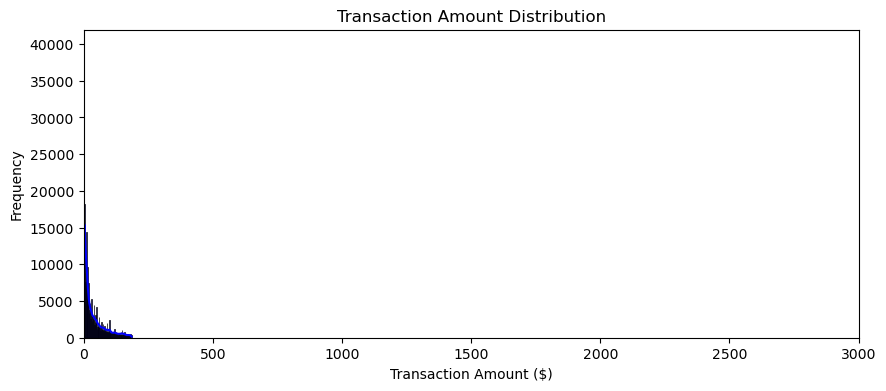

In [9]:
# Plot distribution of 'Amount' to check for skewness and outliers
plt.figure(figsize=(10, 4))
sns.histplot(data["Amount"], bins=100, kde=True, color="blue")
plt.xlim(0, 3000)  # Focus on the majority of values
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Frequency")
plt.show()



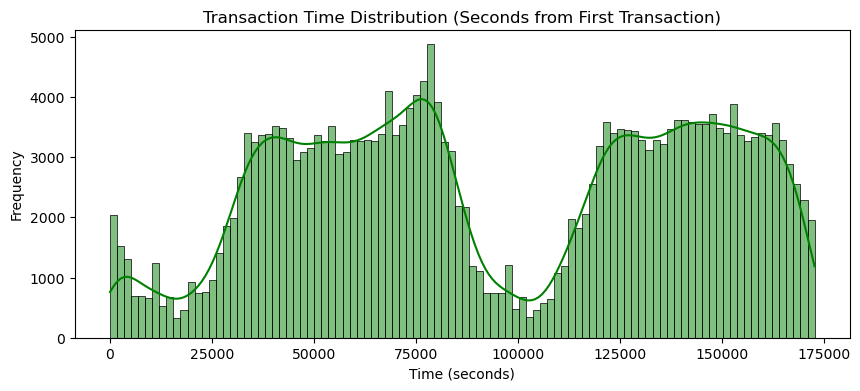

In [10]:
# Plot distribution of 'Time' to check transaction patterns
plt.figure(figsize=(10, 4))
sns.histplot(data["Time"], bins=100, kde=True, color="green")
plt.title("Transaction Time Distribution (Seconds from First Transaction)")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.show()


In [11]:
#convert Time to the correct date format
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')

## Balancing the Data

In [12]:
X = data.drop(columns=["Class", "Time"])  # Exclude datetime column
y = data["Class"]

In [13]:

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


## Feature Engineering and Feature Selection

In [14]:
# Feature Engineering using Standard Scaler
scaler = StandardScaler()
X_resampled['Amount'] = scaler.fit_transform(X_resampled[['Amount']])


In [15]:
# Feature Selection using PCA
pca = PCA(n_components=10)
X_resampled_pca = pca.fit_transform(X_resampled)


## Train Test Split

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)


## Model Selection and Training

#### Logistic Regression Model

In [19]:
model_Log = LogisticRegression(random_state=42)
model_Log.fit(X_train, y_train)
y_pred_Log = model_Log.predict(X_test)


##### Model Evaluation 

In [20]:
print("The model used is Logistic Regression")

acc = accuracy_score(y_test, y_pred_Log)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, y_pred_Log)
print("The precision is {}".format(prec))

rec = recall_score(y_test, y_pred_Log)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, y_pred_Log)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, y_pred_Log)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Logistic Regression
The accuracy is 0.95810732947885
The precision is 0.98119626012188
The recall is 0.9341161510798514
The F1-Score is 0.957077569798569
The Matthews correlation coefficient is0.9172711871586036


#### Random Forest Classifier Model

In [17]:
model_RFC = RandomForestClassifier(random_state=42)
model_RFC.fit(X_train, y_train)
y_pred_RFC = model_RFC.predict(X_test)


##### Model Evaluation 

In [18]:
print("The model used is Random Forest classifier")

acc = accuracy_score(y_test, y_pred_RFC)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, y_pred_RFC)
print("The precision is {}".format(prec))

rec = recall_score(y_test, y_pred_RFC)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, y_pred_RFC)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, y_pred_RFC)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9998708549402953
The precision is 0.9997417765771492
The recall is 1.0
The F1-Score is 0.999870871616588
The Matthews correlation coefficient is0.9997417432288693


#### XGB Classifier Model

In [21]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

C:\Users\WIN-X\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [19:20:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


##### Model Evaluation 

In [22]:
print("The model used is XGB Classifier")

acc = accuracy_score(y_test, y_pred_xgb)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, y_pred_xgb)
print("The precision is {}".format(prec))

rec = recall_score(y_test, y_pred_xgb)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, y_pred_xgb)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, y_pred_xgb)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is XGB Classifier
The accuracy is 0.9997218414098666
The precision is 0.9994439921364602
The recall is 1.0
The F1-Score is 0.9997219187605522
The Matthews correlation coefficient is0.9994438374780849


## Hyperparameter Tuning/Model Improvement

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='f1', cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)


In [ ]:
import joblib
joblib.dump(model, 'fraud_detection_model.pkl')
